In [3]:
%matplotlib inline

import numpy as np
import pylab as plt
import ccgpack as ccg
from skimage import measure

In [5]:
cl = np.load('../data/cl_planck_lensed.npy')

In [6]:
sfs = ccg.StochasticFieldSimulator(cl)

In [7]:
data = sfs.simulate(nside=1024,size=5)

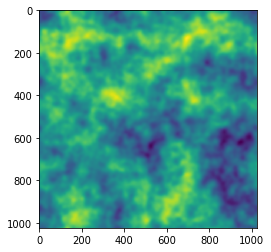

In [8]:
plt.imshow(data)

In [9]:
#contour function and exponent added by mehdi
def carachters(data,nu):    
    contour = measure.find_contours(data,nu)   
    num_c = len(contour)
    perimeter = []
    area = []
    radius = []
    for nc in range(num_c):
        n_points = contour[nc].shape[0]
        x = contour[nc][:,0]
        y = contour[nc][:,1]
        s_nc = 0
        x_c = np.mean(x)
        y_c = np.mean(y)
        r_nc=0
        for i in range(n_points):
            s_nc += np.sqrt((x[i-1]-x[i])**2+(y[i-1]-y[i])**2)
            r_nc += (((x[i]-x_c)**2)+((y_c-y[i])**2))
        A=np.abs(0.5*np.sum(y[:-1]*np.diff(x) - x[:-1]*np.diff(y)))
        perimeter.append(s_nc)
        area.append(A)
        radius.append(np.sqrt(r_nc/n_points))
    perimeter=np.asarray(perimeter)
    area=np.asarray(area)
    radius=np.asarray(radius)    
    return [contour,perimeter,area,radius]


1.1302175482408046

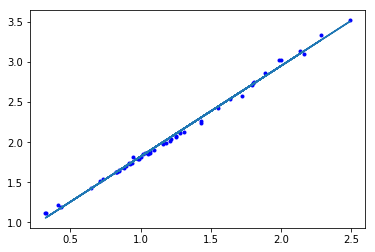

In [10]:
data
th = 0
r1 = 5
r2 = 20

[contour,perimeter,area,radius] = carachters(data,th)

x=np.log10(radius)
y=np.log10(perimeter)
pval = np.polyfit(x,y,1)

plt.plot(x,y,'b.')
plt.plot(x,np.polyval(pval,x))

pval[0]

In [15]:
def smear(data,axis=0):
    n_time = data.shape[axis]
    nt = int(n_time//5)
    sdata = np.array(np.split(data, nt, axis=axis))
    #print(sdata.shape)
                
    return np.mean(sdata,axis=axis+1)

In [16]:
x.shape

(51,)

In [24]:
indsort = np.argsort(x)
x = x[indsort]
y = y[indsort]

(10,)

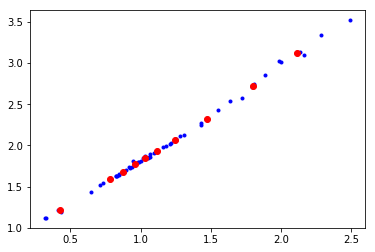

In [26]:
plt.plot(x,y,'b.')
x2 = smear(x[:-1],axis=0,check=0)
y2 = smear(y[:-1],axis=0,check=0)
plt.plot(x2,y2,'ro')
x2.shape

1.129052821392366

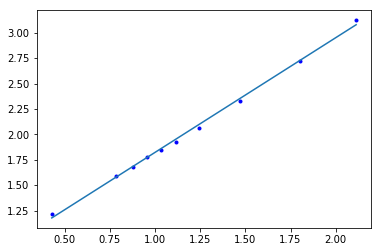

In [27]:

pval = np.polyfit(x2,y2,1)

plt.plot(x2,y2,'b.')
plt.plot(x2,np.polyval(pval,x2))

pval[0]

In [ ]:

# hist, bin_edges = np.histogram(perimeter,20,normed=1)
# bin_cent = 0.5*(bin_edges[:-1]+bin_edges[1:])
# plt.plot(bin_cent,hist)